# Second approach is using Gradient Descent

Gradient Descent is an iterative optimization algorithm used to find the minimum of a function by adjusting parameters in the direction of the steepest descent of the gradient, aiming to minimize the cost or error associated with a model’s predictions. Gradient descent is used in fields such as web analytics, online advertising, and large-scale machine-learning applications.

Linear regression using the gradient descent algorithm involves minimizing the cost function by iteratively updating the model parameters slope(w1​) and y-intercept (w0). The cost function (also known as the loss function) measures the difference between predicted and actual values.

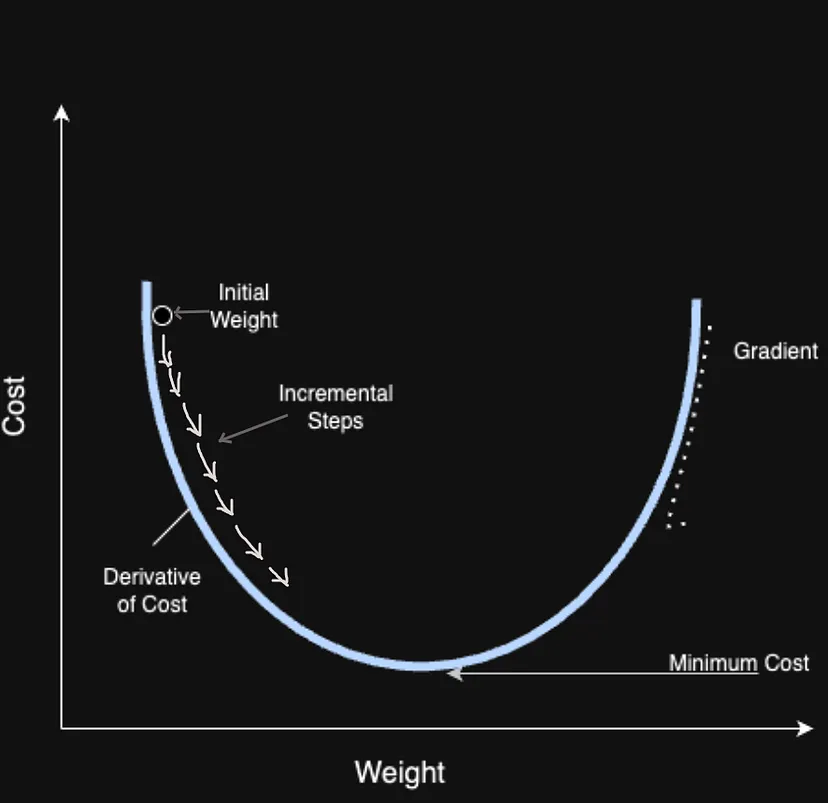

## Implementing Linear Regression using Gradient Descent

Randomly initialize the weights(w1) and biases(w0). The weights and biases will be updated during each iteration of the gradient descent to minimize the loss.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def initialize(dim):
  w1 = np.random.rand(dim)
  w0 = np.random.rand()
  return w1, w0

Compute the cost i.e the difference between the predicted and observed value of y

In [ ]:
def compute_cost(X,Y, y_hat):
    m = len(Y)
    cost = (1/(2*m)) * np.sum(np.square(y_hat - Y))
    return cost

Predict the value of y using weights and biases for the input X


In [ ]:
def predict_y(X,w1,w0):
  if len(w1)==1:
    w1 = w1[0]
    return X*w1+w0
  return np.dot(X,w1)+w0

Update the parameters (w1,w0)

In [ ]:
def update_parameters(X,Y,y_hat,cost,w0,w1,learning_rate):
  m = len(Y)
  db=(np.sum(y_hat-Y))/m
  dw=np.dot(y_hat-Y,X)/m

  w0_new=w0-learning_rate*db
  w1_new=w1-learning_rate*dw
  return w0_new,w1_new

Let’s implement the gradient descent function by iteratively updating the weights and biases to minimize the cost function. We’ll set a maximum threshold for the number of iterations or terminate the iteration when the specified early stopping criterion is met. In our case, the stopping criterion is defined by the difference between the previous and current values of the cost function falling below a specified threshold. Throughout the iterations, we’ll update the cost at each step, allowing us to visualize the trend and assess any issues related to vanishing or exploding gradients.

In [ ]:
def run_gradient_descent(X,Y,alpha,max_iterations,stopping_threshold = 1e-6):
  dims = 1
  if len(X.shape)>1:
    dims = X.shape[1]
  w1,w0=initialize(dims)
  previous_cost = None
  cost_history = np.zeros(max_iterations)
  for itr in range(max_iterations):
    y_hat=predict_y(X,w1,w0)
    cost=compute_cost(X,Y,y_hat)
    # early stopping criteria
    if previous_cost and abs(previous_cost-cost)<=stopping_threshold:
      break
    cost_history[itr]=cost
    previous_cost = cost
    old_w1=w1
    old_w0=w0
    w0,w1=update_parameters(X,Y,y_hat,cost,old_w0,old_w1,alpha)

  return w0,w1,cost_history

Write a function to run gradient descent

In [ ]:
def run_gradient_descent(X, Y, learning_rate, iterations):
    """
    Runs the gradient descent algorithm to find optimal weights for linear regression.

    Args:
        X: Input features (NumPy array).
        Y: Target values (NumPy array).
        learning_rate: The learning rate for gradient descent.
        iterations: The number of iterations to run.

    Returns:
        w0: The optimal y-intercept.
        w1: The optimal slope.
        cost_history: A list containing the cost at each iteration.
    """
    w0 = 0  # Initialize y-intercept
    w1 = 0  # Initialize slope
    n = len(X)  # Number of data points
    cost_history = []  # Initialize cost history list

    for i in range(iterations):
        # Calculate predictions
        Y_pred = w0 + w1 * X

        # Calculate cost (Mean Squared Error)
        cost = (1 / (2 * n)) * sum((Y - Y_pred) ** 2)
        cost_history.append(cost)  # Append cost to history

        # Calculate gradients
        dw0 = -(1 / n) * sum(Y - Y_pred)
        dw1 = -(1 / n) * sum(X * (Y - Y_pred))

        # Update weights
        w0 = w0 - learning_rate * dw0
        w1 = w1 - learning_rate * dw1

    return w0, w1, cost_history

Now let’s put it all together and run the algorithm on a toy dataset as shown below.



In [ ]:
 X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
  55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
  45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
  48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
 Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
  78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
  55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
  60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

Define the hyper-parameters like learning rate and maximum number of iterations and call the gradient descent function.



In [ ]:
# Example usage (assuming X and Y are defined as in your input)
learning_rate = 0.0001
iterations = 10

w0, w1, cost_history = run_gradient_descent(X, Y, learning_rate, iterations)
print(w0, w1)

0.025722329299295254 1.3172871719053094


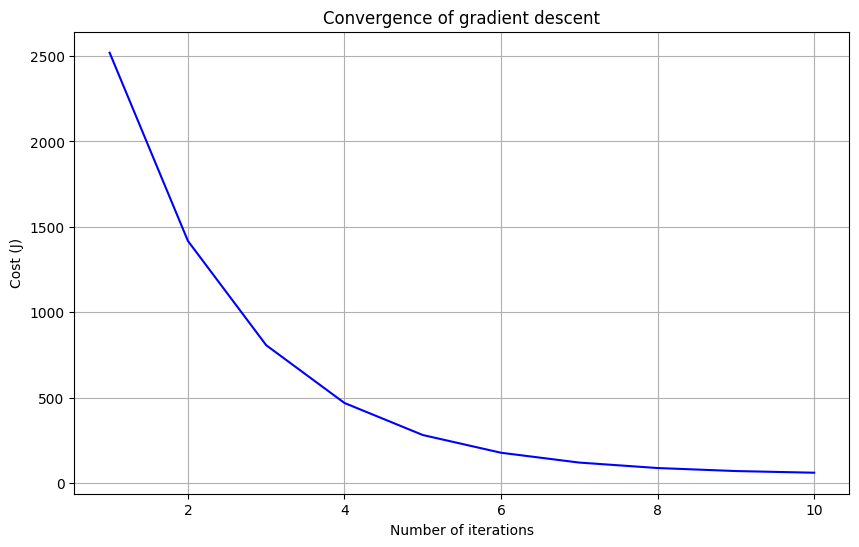

In [ ]:
import numpy as np
import matplotlib.pyplot as plt




# Plot the cost history
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()

Let’s explore another example for running the linear regression implementation using gradient descent, this time with a two-dimensional feature set (X). In this case, each row of X contains two columns of data, making it a dataset with two features for each sample

In [ ]:
def run_gradient_descent(X, Y, learning_rate, iterations):
    """
    Runs the gradient descent algorithm to find optimal weights for linear regression.

    Args:
        X (numpy.ndarray): The feature matrix.
        Y (numpy.ndarray): The target variable vector.
        learning_rate (float): The learning rate for gradient descent.
        iterations (int): The number of iterations to run.

    Returns:
        tuple: A tuple containing the optimized weights (w0, w1) and the cost history.
    """
    n = len(Y)  # Assuming Y is a 1D array of your target variable
    w0 = 0  # Initialize y-intercept to 0
    w1 = np.zeros(X.shape[1])  # Initialize slope(s) to 0 for each feature

    cost_history = []  # Store cost values across iterations

    for i in range(iterations):
        # Calculate prediction using both features and updated weights
        Y_pred = w0 + X.dot(w1)

        # Calculate cost (Mean Squared Error)
        cost = (1 / (2 * n)) * sum((Y - Y_pred) ** 2)
        cost_history.append(cost)  # Append cost to history

        # Calculate gradients
        dw0 = -(1 / n) * sum(Y - Y_pred)
        dw1 = -(1 / n) * X.T.dot(Y - Y_pred)

        # Update weights
        w0 = w0 - learning_rate * dw0
        w1 = w1 - learning_rate * dw1

    return w0, w1, cost_history

In [ ]:
# Set hyperparameters
learning_rate = 0.0001
iterations = 1000

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
m = 200

# generate random features X with two dimensions
X = 10 * np.random.rand(m, 2)  # Scaling by 10 for variety

# generate target variable y with some constant weights and bias
true_weights = np.array([3, 4])
bias = 2
Y = X.dot(true_weights) + bias + np.random.randn(m)  # adding some random noise

w0,w1,cost_history = run_gradient_descent(X,Y,learning_rate,iterations)
print(w0,w1)

0.6413379069443863 [3.34417752 3.85667569]


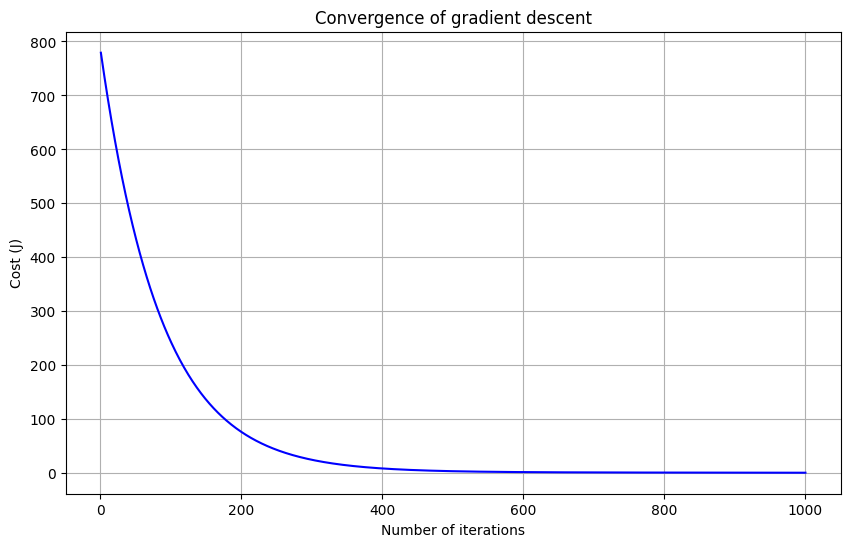

In [ ]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()